0      0.01
1      0.02
2      0.03
3      0.04
4      0.05
       ... 
278    3.09
279    3.11
280    3.12
281    3.13
282    3.14
Name: X, Length: 283, dtype: float64


numpy.ndarray

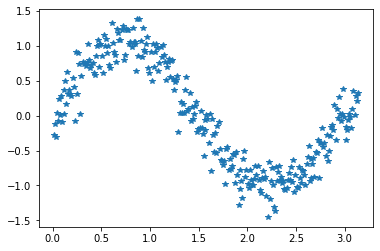

In [186]:
import numpy as np
import functools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline
data = pd.read_csv('trainRegression.csv')
data1= pd.read_csv('testRegression.csv')
testing_x=np.array(data1['X'])
testing_y=np.array(data1['R'])
data.head()
print (data['X'])
plt.plot(data['X'],data['R'],'*')
type(data)
training_x=np.array(data['X'])
training_y=np.array(data['R'])
numpydata = data.values
type(numpydata)


In [187]:
x= np.array(data['X'])
m= np.shape(x)
print(m)
type(m)
res = functools.reduce(lambda sub, ele: sub * 10 + ele, m)
#converting m from tuple to integer
m= res
summation_train_x=training_x.sum()
square_summation_train_x=np.square(training_x).sum()
A=np.array([[len(training_x),summation_train_x],[summation_train_x,square_summation_train_x]])
print(A)
summation_train_y = training_y.sum()
yintox=training_x*training_y
summationof_trainx_train_y=yintox.sum()
Y= [[summation_train_y],[summationof_trainx_train_y]]
print(Y)
theta= np.linalg.inv(A).dot(Y)
print(theta)

(283,)
[[283.     444.95  ]
 [444.95   932.7465]]
[[1.3908700000000067], [-126.6414295]]
[[ 0.8736061 ]
 [-0.55251074]]


0.29907275382945003


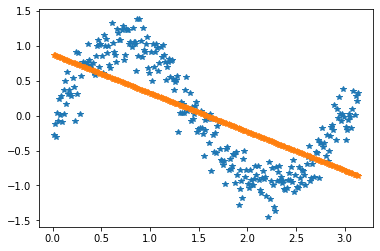

In [188]:
c=theta[0]
slope=theta[1]
PP= slope*training_x+c
#print(PP)
plt.plot(training_x,training_y,'*')
plt.plot(training_x,PP,'*')

meansquarerr=mean_squared_error(PP,training_y)
print(meansquarerr)



testing


0.3159321720459774


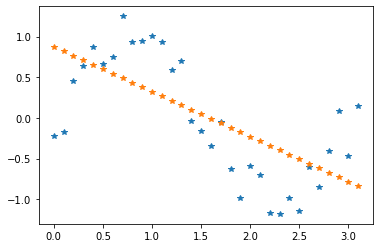

In [189]:
PP1= slope*testing_x+c
plt.plot(testing_x,testing_y,'*')
plt.plot(testing_x,PP1,'*')
meansquarerr_test=mean_squared_error(PP1,testing_y)
print(meansquarerr_test)

now for quadratic

In [190]:
cube_summation_train_x=(np.power(training_x,3)).sum()
quad_summation_train_x=(np.power(training_x,4)).sum()
A1=np.array([[m,summation_train_x,square_summation_train_x],[summation_train_x,square_summation_train_x,cube_summation_train_x],[square_summation_train_x,cube_summation_train_x,quad_summation_train_x]])
print(A1)
square_training_x=np.square(training_x)
training_Y_X2=square_training_x*training_y
sum_training_Y_X2=training_Y_X2.sum()
Y1=np.array([[summation_train_y],[summationof_trainx_train_y],[sum_training_Y_X2]])
print(Y1)

inverse_A1=np.linalg.inv(A1)
print()
#theta1=np.dot(Y1,inverse_A1)

theta1= np.linalg.inv(A1).dot(Y1)
print(theta1)
np.shape(theta1)


[[ 283.          444.95        932.7465    ]
 [ 444.95        932.7465     2199.781025  ]
 [ 932.7465     2199.781025   5533.85257677]]
[[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]]

[[ 1.10611454]
 [-0.99606599]
 [ 0.14104585]]


(3, 1)

0.2882705703732301


0.3260417959496285

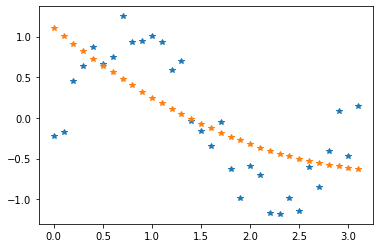

In [197]:
axsq=theta1[2]
bx=theta1[1]
c1=theta1[0]
training_plot=c1+bx*training_x+axsq*square_training_x

plt.plot(training_x,training_y,'*')
plt.plot(training_x,training_plot,'*')
meansquarerr_quad=mean_squared_error(training_y,training_plot)
print(meansquarerr_quad)


0.3260417959496285

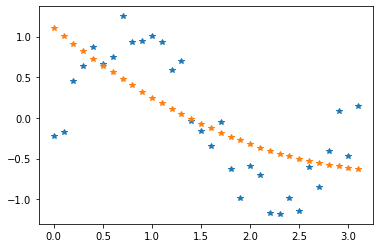

In [212]:

square_testing_x=np.square(testing_x)
testing_plot=c1+bx*testing_x+axsq*square_testing_x
plt.plot(testing_x,testing_y,'*')
plt.plot(testing_x,testing_plot,'*')
meansquarerr_quad_testing=mean_squared_error(testing_y,testing_plot)
meansquarerr_quad_testing

cubic

0.04966025536221562


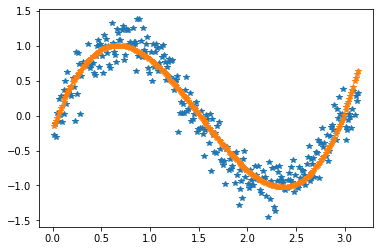

In [211]:
penta_summation_train_x=(np.power(training_x,5)).sum()
hexa_summation_train_x=(np.power(training_x,6)).sum()
cube_training_x=(np.power(training_x,3))
training_Y_X3=cube_training_x*training_y
sum_training_Y_X3=training_Y_X3.sum()
A2=np.array([[m,summation_train_x,square_summation_train_x,cube_summation_train_x],
[summation_train_x,square_summation_train_x,cube_summation_train_x,quad_summation_train_x],
[square_summation_train_x,cube_summation_train_x,quad_summation_train_x,penta_summation_train_x],
[cube_summation_train_x,quad_summation_train_x,penta_summation_train_x,hexa_summation_train_x]])
Y2=np.array([[summation_train_y],[summationof_trainx_train_y],[sum_training_Y_X2],[sum_training_Y_X3]])

theta1,theta2,theta3,theta4= np.linalg.inv(A2).dot(Y2)
#axcube plus bx2 +cx+d
training_plot= theta1 + theta2*training_x+ theta3*square_training_x + theta4*(np.power(training_x,3))
mean_squared_error_cube=mean_squared_error(training_y,training_plot)
print(mean_squared_error_cube)
plt.plot(training_x,training_y,'*')
plt.plot(training_x,training_plot,'*')



0.05154205769095602


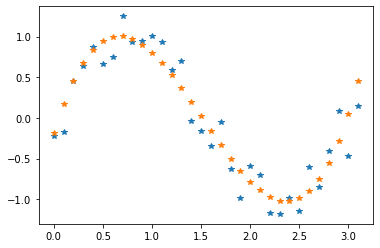

In [210]:
testing_plot= theta1 + theta2*testing_x+ theta3*square_testing_x + theta4*(np.power(testing_x,3))
mean_squared_error_cube=mean_squared_error(testing_y,testing_plot)
print(mean_squared_error_cube)
plt.plot(testing_x,testing_y,'*')
plt.plot(testing_x,testing_plot,'*')
